In [1]:
#using the Yahoo Finance API to collect data.
pip install yfinance

  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import yfinance as yf
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [4]:
#Define the tickers for Apple and Google
#Tickers are known as unique identifiers of traded companies on stock exchanges.
apple_ticker = 'AAPL'
google_ticker = 'GOOGL'

In [5]:
#Define the date range for the last quarter
start_date = '2024-07-01'
end_date = '2024-09-30'

In [6]:
#Fetch historical stock price data using yfinance
apple_data = yf.download(apple_ticker, start=start_date, end=end_date)
google_data = yf.download(google_ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
#Calculate daily returns
apple_data['Daily_Return'] = apple_data['Adj Close'].pct_change()
google_data['Daily_Return'] = google_data['Adj Close'].pct_change()
#Adj close means closing price of the stock adjusted for divideneds, stock splits and other corporate actions.
#pct_change computes the percentage change of the Adj close column from one day to the next.
#Daily Return = (Current Day's Price - Previous Day's Price)/Previous Day's Price

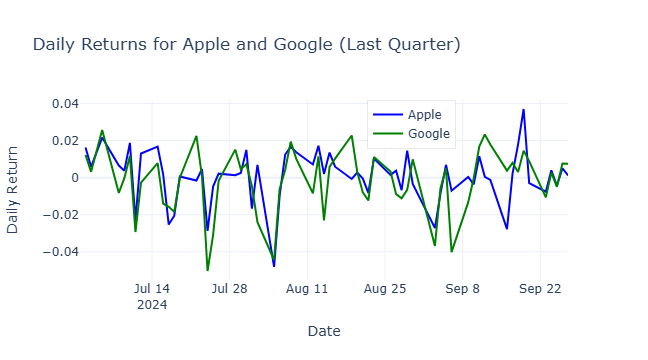

In [36]:
#Create a figure to visualize the daily returns
fig = go.Figure()
fig.add_trace(go.Scatter(x=apple_data.index, y=apple_data['Daily_Return'],
                         mode='lines', name='Apple', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=google_data.index, y=google_data['Daily_Return'],
                         mode='lines', name='Google', line=dict(color='green')))

fig.update_layout(title='Daily Returns for Apple and Google (Last Quarter)',
                  xaxis_title='Date', yaxis_title='Daily Return',
                  legend=dict(x=0.59, y=1,borderwidth=0.12))

fig.show()

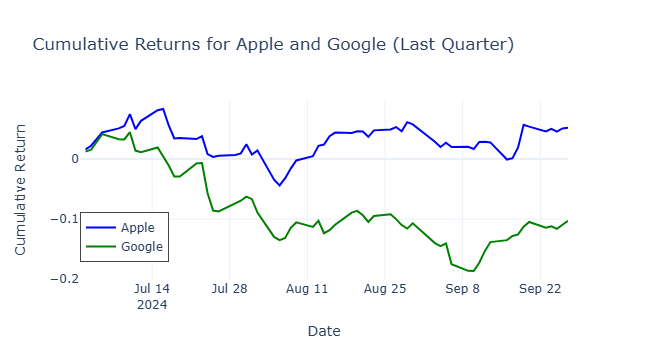

In [37]:
# Calculate cumulative returns for the last quarter
#Cumulative returns represent the total percentage change in the stock's value over a given period, considering the compounding effect of daily returns.
apple_cumulative_return = (1 + apple_data['Daily_Return']).cumprod() - 1
google_cumulative_return = (1 + google_data['Daily_Return']).cumprod() - 1

# Create a figure to visualize the cumulative returns
fig = go.Figure()

fig.add_trace(go.Scatter(x=apple_cumulative_return.index, y=apple_cumulative_return,
                         mode='lines', name='Apple', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=google_cumulative_return.index, y=google_cumulative_return,
                         mode='lines', name='Google', line=dict(color='green')))

fig.update_layout(title='Cumulative Returns for Apple and Google (Last Quarter)',
                  xaxis_title='Date', yaxis_title='Cumulative Return',
                  legend=dict(x=0, y=0.1,borderwidth=1))

fig.show()

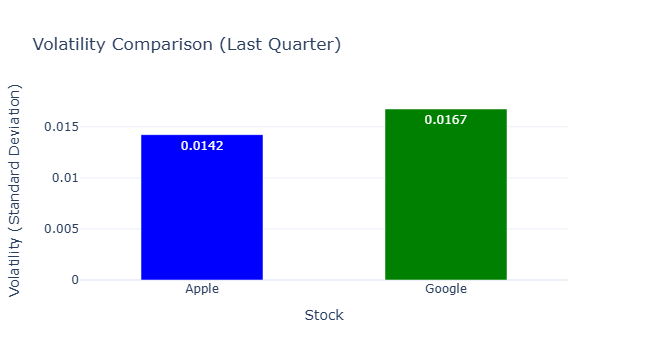

In [39]:
#Volatility is a measure of how much the stock's price fluctuates over time.
#We calculate the Std of daily returns to measure the votality.
#Calculate historical volatility (Standard Deviation of daily returns)
apple_volatility = apple_data['Daily_Return'].std()
google_volatility = google_data['Daily_Return'].std()

#Create a figure to compare volatility
fig1 = go.Figure()
fig1.add_bar(x=['Apple', 'Google'], y=[apple_volatility, google_volatility],
             text=[f'{apple_volatility:.4f}', f'{google_volatility:.4f}'],
             textposition='auto', marker=dict(color=['blue', 'green']))

fig1.update_layout(title='Volatility Comparison (Last Quarter)',
                   xaxis_title='Stock', yaxis_title='Volatility (Standard Deviation)',
                   bargap=0.5)
fig1.show()

In [42]:
market_data = yf.download('^GSPC', start=start_date, end=end_date)   #S&P 500 index as the market benchmark

#Calculte daily returns for both stocks and the market
apple_data['Daily_Return'] = apple_data['Adj Close'].pct_change()
google_data['Daily_Return'] = google_data['Adj Close'].pct_change()
market_data['Daily_Return'] = market_data['Adj Close'].pct_change()

#Calculate Beta for Apple and Google
cov_apple = apple_data['Daily_Return'].cov(market_data['Daily_Return'])
var_market = market_data['Daily_Return'].var()

beta_apple = cov_apple/var_market

cov_google = google_data['Daily_Return'].cov(market_data['Daily_Return'])
beta_google = cov_google/var_market

#Compare Beta values
if beta_apple > beta_google:
    conclusion = "Apple is more volatile (higher Beta) compared to Google."
else:
    conclusion = "Google is more volatile (higher Beta) compared to Apple."

#Print the conclusion
print("Beta for Apple:", beta_apple)
print("Beta for Google:", beta_google)
print(conclusion)

[*********************100%***********************]  1 of 1 completed

Beta for Apple: 0.9526743869484816
Beta for Google: 1.205789425816497
Google is more volatile (higher Beta) compared to Apple.


In [ ]:
#In last we see how much sensitive Apple and Google sotcks are to overall movements, providing insights into thier relative 
#volatility and risk about the broader U.S. stock market represented by the S&P 500 index.

#The Standard & Poor’s 500, often referred to as the S&P 500, is a widely recognized stock market index in the United States. 
#The S&P 500 index includes 500 of the largest publicly traded companies in the United States, chosen for their market capitalization, liquidity, and industry representation.
#These companies span various sectors of the U.S. economy and provide a comprehensive view of the health and performance of the stock market.